# English Premier League Insights
<br/><br/>
### Project Objective:

In this project we will try to get more insights about the `EPL` and answer 3 general questions and examine a hypothesis we will propose to predict specific finding.
The following questions will be seeked answer for:
- Who won most EPL titles ?
- Who collected more points cummulatively ?
- Most losses during one season ?
- Can we predict the EPL winner after `13` game ?

### Importing required libaries for this project :

In [1]:
# for web scraping import
from urllib.request import urlopen
from bs4 import BeautifulSoup

# for data analysis and visualization import
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Web Scraping:

Let's start with the first table. We will start working on scraping the table that represent the ranking after 38 matches (end of the season).

In [2]:
url = "https://www.worldfootball.net/schedule/eng-premier-league-2018-2019-spieltag/38/"
html = urlopen(url)
soup = BeautifulSoup(html, "lxml")
type(soup)

bs4.BeautifulSoup

In [3]:
# inspecting the page, extract the following table tag
table_data = soup.find_all('table', {'class': 'standard_tabelle'})
table_data = table_data[1:]

In [4]:
# use a for loop extract table rows tags and append them into a list
rows = []
for item in table_data:
    rows.append(item.find_all('tr'))
rows = rows[0]  

In [5]:
# use a for loop extract table cells tags and append them into a list
table = []
for team in rows:
    row_td = team.find_all('td')
    row = BeautifulSoup(str(row_td), 'lxml').get_text()
    table.append(row)
table = table[1:]
table

['[1, \n\n, \nManchester City\n, 38, 32, 2, 4, 95:23, 72, 98]',
 '[2, \n\n, \nLiverpool FC\n, 38, 30, 7, 1, 89:22, 67, 97]',
 '[3, \n\n, \nChelsea FC\n, 38, 21, 9, 8, 63:39, 24, 72]',
 '[4, \n\n, \nTottenham Hotspur\n, 38, 23, 2, 13, 67:39, 28, 71]',
 '[5, \n\n, \nArsenal FC\n, 38, 21, 7, 10, 73:51, 22, 70]',
 '[6, \n\n, \nManchester United\n, 38, 19, 9, 10, 65:54, 11, 66]',
 '[7, \n\n, \nWolverhampton Wanderers\n, 38, 16, 9, 13, 47:46, 1, 57]',
 '[8, \n\n, \nEverton FC\n, 38, 15, 9, 14, 54:46, 8, 54]',
 '[9, \n\n, \nLeicester City\n, 38, 15, 7, 16, 51:48, 3, 52]',
 '[10, \n\n, \nWest Ham United\n, 38, 15, 7, 16, 52:55, -3, 52]',
 '[11, \n\n, \nWatford FC\n, 38, 14, 8, 16, 52:59, -7, 50]',
 '[12, \n\n, \nCrystal Palace\n, 38, 14, 7, 17, 51:53, -2, 49]',
 '[13, \n\n, \nNewcastle United\n, 38, 12, 9, 17, 42:48, -6, 45]',
 '[14, \n\n, \nAFC Bournemouth\n, 38, 13, 6, 19, 56:70, -14, 45]',
 '[15, \n\n, \nBurnley FC\n, 38, 11, 7, 20, 45:68, -23, 40]',
 '[16, \n\n, \nSouthampton FC\n, 38, 9, 

Now, the data scraped from the website is ready to be read into pandas.

### Data Manipulation and Cleaning

In [6]:
# read the table into dataframe
df = pd.DataFrame(table)
df.head(3)

,0
0,"[1, \n\n, \nManchester City\n, 38, 32, 2, 4, 9..."
1,"[2, \n\n, \nLiverpool FC\n, 38, 30, 7, 1, 89:2..."
2,"[3, \n\n, \nChelsea FC\n, 38, 21, 9, 8, 63:39,..."


In [7]:
# split rows in to columns
df1 = df[0].str.split(',', expand=True)
df1.head(3)

,0,1,2,3,4,5,6,7,8,9
0,[1,\n\n,\nManchester City\n,38,32,2,4,95:23,72,98]
1,[2,\n\n,\nLiverpool FC\n,38,30,7,1,89:22,67,97]
2,[3,\n\n,\nChelsea FC\n,38,21,9,8,63:39,24,72]


We need to split `column 7` to two new columns. To do that, first we need copy and add the next two columns `column 8 and 9` to the end of the table, since the new second splitted column will overwrite `column 8`. And to maintain their order too.

In [8]:
# copy and add columns 8 and 9 to the end of the table
df1[[10,11]] = df1[[8,9]]
df1.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11
0,[1,\n\n,\nManchester City\n,38,32,2,4,95:23,72,98],72,98]
1,[2,\n\n,\nLiverpool FC\n,38,30,7,1,89:22,67,97],67,97]
2,[3,\n\n,\nChelsea FC\n,38,21,9,8,63:39,24,72],24,72]


In [9]:
# split column 7 to 
df1[[7,8]] = df1[7].str.split(':', expand=True)
df1.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11
0,[1,\n\n,\nManchester City\n,38,32,2,4,95,23,98],72,98]
1,[2,\n\n,\nLiverpool FC\n,38,30,7,1,89,22,97],67,97]
2,[3,\n\n,\nChelsea FC\n,38,21,9,8,63,39,72],24,72]


In [10]:
# drop redundant columns
df2 = df1.drop([1,9], axis=1)
df2.head(3)

,0,2,3,4,5,6,7,8,10,11
0,[1,\nManchester City\n,38,32,2,4,95,23,72,98]
1,[2,\nLiverpool FC\n,38,30,7,1,89,22,67,97]
2,[3,\nChelsea FC\n,38,21,9,8,63,39,24,72]


In [11]:
# strip column 0, 2 and 11 from unwanted characters
df2[0] = df2[0].str.strip('[')
df2[2] = df2[2].str.strip('\n').str.strip(' \n')
df2[11] = df2[11].str.strip(']')
# reset columns labels
df2.columns = range(df2.shape[1])
df2.head(3)

,0,1,2,3,4,5,6,7,8,9
0,1,Manchester City,38,32,2,4,95,23,72,98
1,2,Liverpool FC,38,30,7,1,89,22,67,97
2,3,Chelsea FC,38,21,9,8,63,39,24,72


Now the first table is ready, only columns headers are missing.

In [12]:
# name the labels of the table
df2 = df2.rename(columns=
                 {0: 'rank', 1: 'team', 2: 'matches_played', 3: 'wins', 4:'drawns', 
                  5: 'losses', 6:'goals_for', 7: 'goals_against', 8: 'goals_diff', 9: 'points'
                 }
                )
df2.head(3)

,rank,team,matches_played,wins,drawns,losses,goals_for,goals_against,goals_diff,points
0,1,Manchester City,38,32,2,4,95,23,72,98
1,2,Liverpool FC,38,30,7,1,89,22,67,97
2,3,Chelsea FC,38,21,9,8,63,39,24,72


In [13]:
# add a new column called shows the season
df2['season'] = '2018/2019'
table_18_19 = df2
table_18_19.head(3)

,rank,team,matches_played,wins,drawns,losses,goals_for,goals_against,goals_diff,points,season
0,1,Manchester City,38,32,2,4,95,23,72,98,2018/2019
1,2,Liverpool FC,38,30,7,1,89,22,67,97,2018/2019
2,3,Chelsea FC,38,21,9,8,63,39,24,72,2018/2019


Before moving on, we need to check the quality of our table

In [14]:
# check table info
table_18_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
rank              20 non-null object
team              20 non-null object
matches_played    20 non-null object
wins              20 non-null object
drawns            20 non-null object
losses            20 non-null object
goals_for         20 non-null object
goals_against     20 non-null object
goals_diff        20 non-null object
points            20 non-null object
season            20 non-null object
dtypes: object(11)
memory usage: 1.8+ KB


Looks like several values of our table need to be converted to integers, but will do this later.

Now our first table is ready, which represent season `2018/2019`. Next we will get the remained 9 season's tables. And since we will use the same process again, it's better to wrap all the steps and codes in one fuction.

In [15]:
# define a function that take arguments 'url' and 'season' and return season table
def get_pl_table(url, season):
    html = urlopen(url)
    soup = BeautifulSoup(html, "lxml")
    
    table_data = soup.find_all('table', {'class': 'standard_tabelle'})
    table_data = table_data[1:]
    
    rows = []
    for item in table_data:
        rows.append(item.find_all('tr'))
    rows = rows[0]  
    
    table = []
    for team in rows:
        row_td = team.find_all('td')
        row = BeautifulSoup(str(row_td), 'lxml').get_text()
        table.append(row)
    table = table[1:]
    
    df = pd.DataFrame(table)
    df1 = df[0].str.split(',', expand=True)
    df1[[10,11]] = df1[[8,9]]
    
    df1[[7,8]] = df1[7].str.split(':', expand=True)
    
    df2 = df1.drop([1,9], axis=1)
    
    df2[0] = df2[0].str.strip('[')
    df2[2] = df2[2].str.strip('\n').str.strip(' \n')
    df2[11] = df2[11].str.strip(']')
    df2.columns = range(df2.shape[1])
    
    df3 = df2.rename(columns={0: 'rank', 1: 'team', 2: 'matches_played', 3: 'wins', 4: 'drawns', 5: 'losses', 6: 'goals_for', 7: 'goals_against', 8: 'goals_diff', 9: 'points'})
    
    df3['season'] = season
    return df3
    
url = "https://www.worldfootball.net/schedule/eng-premier-league-2018-2019-spieltag/13/"
season = '2018/2019'    
pl_table = get_pl_table(url, season)
pl_table.head(3)

,rank,team,matches_played,wins,drawns,losses,goals_for,goals_against,goals_diff,points,season
0,1,Manchester City,13,11,2,0,40,5,35,35,2018/2019
1,2,Liverpool FC,13,10,3,0,26,5,21,33,2018/2019
2,3,Tottenham Hotspur,13,10,0,3,23,11,12,30,2018/2019


Next we will the get the remained tables.

In [16]:
# generate the links of all seasons
url_38 = [("https://www.worldfootball.net/schedule/eng-premier-league-" + str(u) +'-' + str(u + 1) + '-spieltag/38/') for u in range(1995,2019)]   
    
url_42 = [("https://www.worldfootball.net/schedule/eng-premier-league-" + str(u) +'-' + str(u + 1) + '-spieltag/42/') for u in range(1992,1995)]   
   
urls = url_38 + url_42

urls = sorted(urls, reverse=True)
    
# generate the seasons year
seasons = []
for y in range(1992,2019):
    i = (str(y) + '/' + str(y + 1))
    seasons.append(i)
seasons = sorted(seasons, reverse=True)

# generate dataframe contains all seasons from 'urls' and 'seasons'
appended_data = []
for i, j in zip(urls, seasons):
    data = get_pl_table(i, j)
    appended_data.append(data)
    
# concatenate all datasets together     
pl_tables_38 = pd.concat(appended_data, axis=0)
pl_tables_38.shape

(546, 11)

In [17]:
pl_tables_38.tail()

,rank,team,matches_played,wins,drawns,losses,goals_for,goals_against,goals_diff,points,season
17,18,Southampton FC,42,13,11,18,54,61,-7,50,1992/1993
18,19,Oldham Athletic,42,13,10,19,63,74,-11,49,1992/1993
19,20,Crystal Palace,42,11,16,15,48,61,-13,49,1992/1993
20,21,Middlesbrough FC,42,11,11,20,54,75,-21,44,1992/1993
21,22,Nottingham Forest,42,10,10,22,41,62,-21,40,1992/1993


Our dataset returned `546` rows. Let's examine this number, it's easy to know, how many seasons we had since the start of the `Premier League`. Also we know that theirs 20 clubs in thw league. 

In [18]:
# calculate how many seasons passed the start of the PL
number_of_seasons = len(pl_tables_38['season'].unique())
number_of_seasons

27

In [19]:
# check if the result of the multiplication of 27 seasons by 20 clubs equals the number of dataset rows
number_of_seasons == pl_tables_38.shape[0]

False

A little research in the history of the `Premier League` and we can find that, in the first three seasons, there were 22 clubs instead of 20. Later the number of clubs scaled back to 20 from 22.

In [20]:
# check if this information is correct

print('The numbers of clubs in season 1992/1993 : ' + str(len(pl_tables_38[pl_tables_38['season'] == '1992/1993'])))
print('The numbers of clubs in season 1993/1994 : ' + str(len(pl_tables_38[pl_tables_38['season'] == '1993/1994'])))  
print('The numbers of clubs in season 1994/1995 : ' + str(len(pl_tables_38[pl_tables_38['season'] == '1994/1995']))) 
print('The numbers of clubs in season 1995/1996 : ' + str(len(pl_tables_38[pl_tables_38['season'] == '1995/1996'])))

The numbers of clubs in season 1992/1993 : 22
The numbers of clubs in season 1993/1994 : 22
The numbers of clubs in season 1994/1995 : 22
The numbers of clubs in season 1995/1996 : 20


Now after confirming the number of the rows of the dataset was correct we can move on with the rest data exploration.

In [21]:
# checks if any of columns in dataset has null values - should print False
pl_tables_38.isnull().sum().any()

False

In [22]:
# check top rows
pl_tables_38.head()

,rank,team,matches_played,wins,drawns,losses,goals_for,goals_against,goals_diff,points,season
0,1,Manchester City,38,32,2,4,95,23,72,98,2018/2019
1,2,Liverpool FC,38,30,7,1,89,22,67,97,2018/2019
2,3,Chelsea FC,38,21,9,8,63,39,24,72,2018/2019
3,4,Tottenham Hotspur,38,23,2,13,67,39,28,71,2018/2019
4,5,Arsenal FC,38,21,7,10,73,51,22,70,2018/2019


In [23]:
# check bottom rows
pl_tables_38.tail()

,rank,team,matches_played,wins,drawns,losses,goals_for,goals_against,goals_diff,points,season
17,18,Southampton FC,42,13,11,18,54,61,-7,50,1992/1993
18,19,Oldham Athletic,42,13,10,19,63,74,-11,49,1992/1993
19,20,Crystal Palace,42,11,16,15,48,61,-13,49,1992/1993
20,21,Middlesbrough FC,42,11,11,20,54,75,-21,44,1992/1993
21,22,Nottingham Forest,42,10,10,22,41,62,-21,40,1992/1993


In [24]:
# reset index indices
pl_tables_38 = pl_tables_38.reset_index(drop=True)
pl_tables_38.tail()

,rank,team,matches_played,wins,drawns,losses,goals_for,goals_against,goals_diff,points,season
541,18,Southampton FC,42,13,11,18,54,61,-7,50,1992/1993
542,19,Oldham Athletic,42,13,10,19,63,74,-11,49,1992/1993
543,20,Crystal Palace,42,11,16,15,48,61,-13,49,1992/1993
544,21,Middlesbrough FC,42,11,11,20,54,75,-21,44,1992/1993
545,22,Nottingham Forest,42,10,10,22,41,62,-21,40,1992/1993


In [25]:
# check dataset shape and columns data types
pl_tables_38.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 11 columns):
rank              546 non-null object
team              546 non-null object
matches_played    546 non-null object
wins              546 non-null object
drawns            546 non-null object
losses            546 non-null object
goals_for         546 non-null object
goals_against     546 non-null object
goals_diff        546 non-null object
points            546 non-null object
season            546 non-null object
dtypes: object(11)
memory usage: 47.0+ KB


We need to convert all the columns except `team` and `season` columns to `integers`.

In [26]:
# show the labels
cols_to_integers = list(pl_tables_38.columns)
cols_to_integers

['rank',
 'team',
 'matches_played',
 'wins',
 'drawns',
 'losses',
 'goals_for',
 'goals_against',
 'goals_diff',
 'points',
 'season']

In [27]:
# remove columns labels that we don't want to convert to integers
not_integers = ['team', 'season']
for i in not_integers:
    cols_to_integers.remove(i)
cols_to_integers

['rank',
 'matches_played',
 'wins',
 'drawns',
 'losses',
 'goals_for',
 'goals_against',
 'goals_diff',
 'points']

In [28]:
# covert the selected columns to integers
pl_tables_38[cols_to_integers] = pl_tables_38[cols_to_integers].apply(pd.to_numeric)

# check column data types
pl_tables_38.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 11 columns):
rank              546 non-null int64
team              546 non-null object
matches_played    546 non-null int64
wins              546 non-null int64
drawns            546 non-null int64
losses            546 non-null int64
goals_for         546 non-null int64
goals_against     546 non-null int64
goals_diff        546 non-null int64
points            546 non-null int64
season            546 non-null object
dtypes: int64(9), object(2)
memory usage: 47.0+ KB


Now we have a clean dataset ready for analyzing and visualizing, so we can try to answer our questions.

## Visualizing and answering our questions 

### First Question
Who won most EPL titles ?

In [29]:
most_title_winner = pl_tables_38.loc[pl_tables_38['rank'] == 1, 'team'].value_counts().sort_index()
most_title_winner

Arsenal FC            3
Blackburn Rovers      1
Chelsea FC            5
Leicester City        1
Manchester City       4
Manchester United    13
Name: team, dtype: int64

'Manchester United titles won accounts for 48.15 % of the EPL titles'

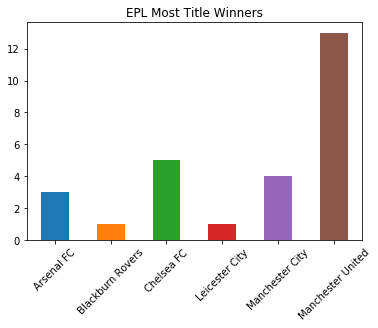

In [30]:
most_title_winner.plot.bar(title='EPL Most Title Winners', rot=45)
winning_titles_percent = most_title_winner['Manchester United'] / most_title_winner.sum() * 100
'Manchester United titles won accounts for {:.2f} % of the EPL titles'.format(winning_titles_percent)

Look like `Manchester United` won most EPL titles. `Manchester United` won 13 titles from the 27 season played untill today

### Second Question
Who collected more points cummulatively ?

In [31]:
most_points = pl_tables_38.groupby('team').agg(sum)
most_points['points'].sort_values(ascending=False).head(10)

team
Manchester United    2168
Arsenal FC           1955
Chelsea FC           1931
Liverpool FC         1849
Tottenham Hotspur    1595
Everton FC           1427
Manchester City      1369
Newcastle United     1272
Aston Villa          1223
West Ham United      1098
Name: points, dtype: int64

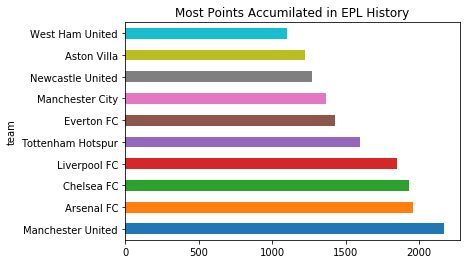

In [32]:
most_points['points'].sort_values(ascending=False).head(10).plot.barh(title='Most Points Accumilated in EPL History')

Seems like `Manchester United` too collected more points than other clubs. But there is an interesting observation here considering the two previous outputs, that `Arsenal FC` came close second in collecting point after `Manchester United`, yet the difference in titles wons is substantial. In the same time `Chelsea FC` and `Manchester City` won more titles than `Arsenal FC` but still behind in most points collected by a club. 

In [33]:
# check who is the most runner up club
most_runner_up = pl_tables_38.loc[pl_tables_38['rank'] == 2, 'team'].value_counts()
most_runner_up

Arsenal FC           6
Manchester United    6
Chelsea FC           4
Liverpool FC         4
Manchester City      2
Newcastle United     2
Aston Villa          1
Blackburn Rovers     1
Tottenham Hotspur    1
Name: team, dtype: int64

You guessed it right, `Arsenal FC`! `Arsenal FC` came second more than any club else (jointly with `Manchester United`). That's why `Arsenal FC` has more points collected in the 27 seasons than other clubs except `Manchester United`. Also because of the 3 titles `Arsenal FC` won too.

### Question 3
Most losses during one season ?

In [34]:
# find out the teams with most losses during one season
most_losses = pl_tables_38.sort_values('losses', ascending=False)
top_5_losses = most_losses[['team', 'losses', 'season']].head()
top_5_losses

,team,losses,season
239,Derby County,29,2007/2008
279,Sunderland AFC,29,2005/2006
501,Ipswich Town,29,1994/1995
19,Huddersfield Town,28,2018/2019
79,Aston Villa,27,2015/2016


In [35]:
loss_percent = pl_tables_38.loc[239, 'losses'] / pl_tables_38.loc[239, 'matches_played'] * 100
'The top of this list lost {:.2f} % of their games'.format(loss_percent)

'The top of this list lost 76.32 % of their games'

### Question 4
Predicting the EPL winner after `13` game. To do that, we need get `EPL` standing after `13` matches for all seasons. 

In [36]:
# scraping, cleaning and concatenate the tables together
# generate the links of all seasons
url_13 = [("https://www.worldfootball.net/schedule/eng-premier-league-" + str(u) +'-' + str(u + 1) + '-spieltag/13/') for u in range(1992,2019)]   
    
urls = sorted(url_13, reverse=True)
    
# generate the seasons year
seasons = []
for y in range(1992,2019):
    i = (str(y) + '/' + str(y + 1))
    seasons.append(i)
seasons = sorted(seasons, reverse=True)

# generate dataframe contains all seasons from 'urls' and 'seasons'
appended_data = []
for i, j in zip(urls, seasons):
    data = get_pl_table(i, j)
    appended_data.append(data)

# concatenate all datasets together     
pl_tables_13 = pd.concat(appended_data, axis=0)
pl_tables_13.shape

(546, 11)

In [37]:
# check top rows
pl_tables_13.head()

,rank,team,matches_played,wins,drawns,losses,goals_for,goals_against,goals_diff,points,season
0,1,Manchester City,13,11,2,0,40,5,35,35,2018/2019
1,2,Liverpool FC,13,10,3,0,26,5,21,33,2018/2019
2,3,Tottenham Hotspur,13,10,0,3,23,11,12,30,2018/2019
3,4,Chelsea FC,13,8,4,1,28,11,17,28,2018/2019
4,5,Arsenal FC,13,8,3,2,28,16,12,27,2018/2019


In [38]:
# check bottom rows
pl_tables_13.tail()

,rank,team,matches_played,wins,drawns,losses,goals_for,goals_against,goals_diff,points,season
17,18,Tottenham Hotspur,13,2,6,5,12,22,-10,12,1992/1993
18,19,Crystal Palace,13,1,8,4,17,21,-4,11,1992/1993
19,,Wimbledon FC,13,2,5,6,17,21,-4,11,1992/1993
20,21,Southampton FC,13,2,5,6,11,17,-6,11,1992/1993
21,22,Nottingham Forest,13,2,4,7,11,22,-11,10,1992/1993


In [39]:
# reset index indices
pl_tables_13 = pl_tables_13.reset_index(drop=True)

Our next step should be converting all rows except `team` and `season` to `integers`, but when trying to do that, the following error has been encountered `'Unable to parse string "\xa0" at position 252', 'occurred at index rank'`. So we will do more investigation in `rank` column

In [40]:
# check unique values of this column, expect sequence numbers from 1 & 22
pl_tables_13['rank'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '\xa0', '21', '22'],
      dtype=object)

We found the value that raise the error which is `\xa0` the non-breaking space in Latin1 (ISO 8859-1).

In [41]:
# Check other columns if contain this char
pl_tables_13.isin(['\xa0']).any()

rank               True
team              False
matches_played    False
wins              False
drawns            False
losses            False
goals_for         False
goals_against     False
goals_diff        False
points            False
season            False
dtype: bool

Gladly it's only found in `rank` column.

In [42]:
# check where this char found
pl_tables_13[pl_tables_13['rank'] == '\xa0']

,rank,team,matches_played,wins,drawns,losses,goals_for,goals_against,goals_diff,points,season
252,,Tottenham Hotspur,13,4,4,5,10,15,-5,16,2006/2007
411,,Liverpool FC,13,4,4,5,20,17,3,16,1998/1999
543,,Wimbledon FC,13,2,5,6,17,21,-4,11,1992/1993


In [43]:
# verify this char \xa0 contained in these indices
pl_tables_13.loc[252, 'rank'] == '\xa0'

True

After inspecting the source website that we scrape the data from, we found these 3 rows did not contain specific ranks in front of these 3 teams. 

Next we will try to fill these wrong values, with the wright rank. 

In [44]:
# replace the values of rank in these indices with wright rank
indices = [252, 411, 543]

for i in indices:
    pl_tables_13.loc[i, 'rank'] = (int(pl_tables_13.loc[(i - 1), 'rank']) + 1)

In [45]:
# verify again this char \xa0 still contained in these indices
pl_tables_13.loc[252, 'rank'] == '\xa0'

False

In [46]:
# more verification
pl_tables_13.iloc[indices]

,rank,team,matches_played,wins,drawns,losses,goals_for,goals_against,goals_diff,points,season
252,13,Tottenham Hotspur,13,4,4,5,10,15,-5,16,2006/2007
411,12,Liverpool FC,13,4,4,5,20,17,3,16,1998/1999
543,20,Wimbledon FC,13,2,5,6,17,21,-4,11,1992/1993


After cleaning the dataset, now we can convert the selected columns to `integers`

In [47]:
# convert the selected columns to integers
pl_tables_13[cols_to_integers] = pl_tables_13[cols_to_integers].apply(pd.to_numeric)
pl_tables_13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 11 columns):
rank              546 non-null int64
team              546 non-null object
matches_played    546 non-null int64
wins              546 non-null int64
drawns            546 non-null int64
losses            546 non-null int64
goals_for         546 non-null int64
goals_against     546 non-null int64
goals_diff        546 non-null int64
points            546 non-null int64
season            546 non-null object
dtypes: int64(9), object(2)
memory usage: 47.0+ KB


In [48]:
# show the leaders of the EPL after 13 matches
leaders_13 = pl_tables_13[pl_tables_13['rank'] == 1]
leaders_13.head()

,rank,team,matches_played,wins,drawns,losses,goals_for,goals_against,goals_diff,points,season
0,1,Manchester City,13,11,2,0,40,5,35,35,2018/2019
20,1,Manchester City,13,12,1,0,42,8,34,37,2017/2018
40,1,Chelsea FC,13,10,1,2,29,10,19,31,2016/2017
60,1,Leicester City,13,8,4,1,28,20,8,28,2015/2016
80,1,Chelsea FC,13,10,3,0,30,11,19,33,2014/2015


In [49]:
# show the leaders of the EPL after 38 matches
leaders_38 = pl_tables_38[pl_tables_38['rank'] == 1]
leaders_38.head()

,rank,team,matches_played,wins,drawns,losses,goals_for,goals_against,goals_diff,points,season
0,1,Manchester City,38,32,2,4,95,23,72,98,2018/2019
20,1,Manchester City,38,32,4,2,106,27,79,100,2017/2018
40,1,Chelsea FC,38,30,3,5,85,33,52,93,2016/2017
60,1,Leicester City,38,23,12,3,68,36,32,81,2015/2016
80,1,Chelsea FC,38,26,9,3,73,32,41,87,2014/2015


In [50]:
# calculate the the number of the seasons that the leader's rank after 13 games match the winner of the title after 38 games. 
def leaders_match(x, y):    
    both_leaders = {'yes': 0 , 'no': 0}
    for i, j in zip(leaders_13.index, leaders_38.index):
        if leaders_13.loc[i, 'team'] == leaders_38.loc[j, 'team']:
            both_leaders['yes'] += 1 
        else:
            both_leaders['no'] += 1
    return both_leaders
        
yes_or_no = leaders_match(leaders_13.index, leaders_38.index)
yes_or_no

{'yes': 14, 'no': 13}

From above we find that the leader after 13 games won the title 14 times. While lost 13 times. 

The approach we will follow to determine the probability of a team to win the title, by deviding the the number of the seasons, the the rank of the leader after 13 matches, matchs the leader after 38 matches (at the end of the season), by the total number of the seasons to date.

In [51]:
percent = yes_or_no['yes'] / (yes_or_no['yes'] + yes_or_no['no']) * 100
'The chance of the leader after 13 matches to win the title is : {:.2f} %'.format(percent)

'The chance of the leader after 13 matches to win the title is : 51.85 %'

Based on the finding above we understand that the hypothesis we investigated led to the finding that, no preference given to the leader of the league after 13 games, in oreder to win the title at the end of the season.

In [52]:
pl_tables = pd.concat([pl_tables_13, pl_tables_38], axis = 0)
pl_tables.to_csv('pl_tanles', encoding='utf-8', index=False)

## Conclusion

In this project we came to conclusion that:
- The most winner of `EPL` title is `Manchester United` with `13` titles.
- `Manchester United` has collected most points `cumulatively`. Also in this part we found out that `Arsenal Fc` came second place, despite the fact that `Arsenal FC` won less titles compared to `Chelsea FC` and `Mancheter City` who came second place and third place consecutively in the most winners of `EPL` title category.
- We found out that `Derby County` in 2007/2008, `Sunderland AFC` in 2005/2006 and `Ipswich Town` in 1994/1995, are the teams with most losses during one season. And that accounts for loosing `76.32 %` of your games.
- We also tried to predict the winner of league title with an assumption that the leader of the league after 13 matches will remain the same untill the end of the season. But we ended up finding out that a team has a low chance `51.85 %` of winning the title after being the leader after 13 games. Many factors involve in deciding who is the winner of the league, to name a few: Injuries, crowded schedule, players transfer, etc...